In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.multiclass
import sklearn.linear_model
% matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# TODO: Augment training data with not relevant

In [4]:
crime_df = df.ix[df.loc[:, 'OEMC':'TASR'].any(1), :]
print(crime_df.shape)
crime_df = crime_df.append(df.ix[~df['relevant'], :].sample(n=3000, axis=0))
print(crime_df.shape)

idx = np.random.permutation(crime_df.shape[0])
trn = crime_df.iloc[idx[:int(crime_df.shape[0] * 0.7)], :]
tst = crime_df.iloc[idx[int(crime_df.shape[0] * 0.7):], :]
print(trn.shape)
print(tst.shape)

(36986, 45)
(39986, 45)
(27990, 45)
(11996, 45)


In [5]:
# vectorize data
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer=LemmaTokenizer(),
                                                             binary=True)
X = vectorizer.fit_transform(trn['bodytext'].values)

Y = trn.loc[:, 'OEMC':'TASR'].values

In [6]:
X.shape

(27990, 224764)

In [7]:
import benchmark_tagging as bt

In [8]:
bench_results = bt.benchmark(
    lambda: sklearn.multiclass.OneVsRestClassifier(
        sklearn.linear_model.LogisticRegression()
    ),
    vectorizer.transform(crime_df['bodytext'].values),
    crime_df.loc[:, 'OEMC':'TASR'].values
)

In [9]:
fpr = pd.DataFrame(bench_results['fpr'], columns=crime_df.columns.values[7:]).T

tpr = pd.DataFrame(bench_results['tpr'], columns=crime_df.columns.values[7:]).T

ppv = pd.DataFrame(bench_results['ppv'], columns=crime_df.columns.values[7:]).T

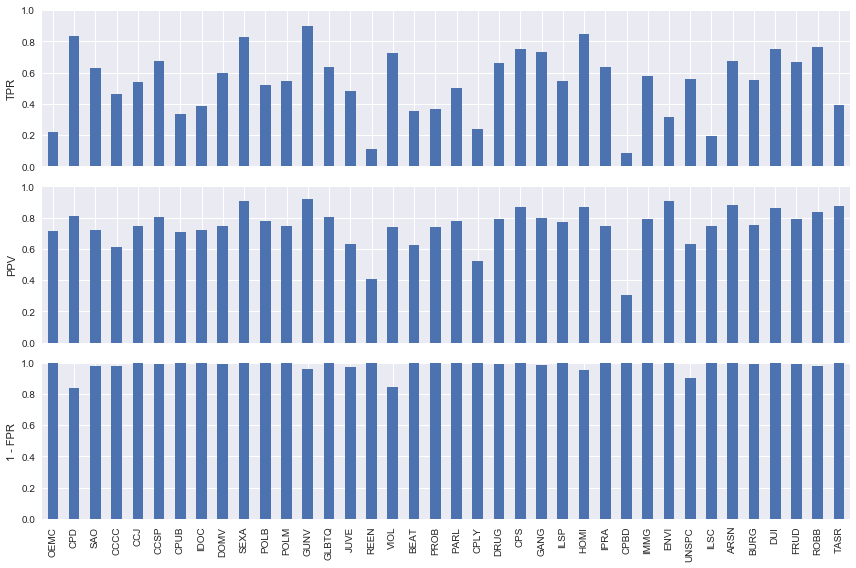

In [10]:
f, axs = plt.subplots(3,1)
tpr.mean(axis=1).plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('TPR')
axs[0].set_xticklabels([])
axs[0].set_ylim([0, 1])
ppv.mean(axis=1).plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('PPV')
axs[1].set_xticklabels([])
axs[1].set_ylim([0, 1])
(1 - fpr).mean(axis=1).plot(kind='bar', ax=axs[2])
axs[2].set_ylabel('1 - FPR')
axs[2].set_ylim([0, 1])
plt.tight_layout()
plt.show()

In [11]:
bt.predict_articles(bench_results['clfs'][0], vectorizer, df)

In [12]:
(df['relevant']).sum()

112091

In [13]:
(~df['relevant']).sum()

159717

In [14]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [15]:
not_rel = df.ix[~df['relevant'], :]
print(not_rel.iloc[-1,2])

Preview: Blackhawks-Islanders


In [16]:
homicide_articles = df.ix[df['HOMI'] == True, 'bodytext']

In [17]:
import addresses

In [18]:
addresses.parse_addresses(' '.join("""Police were notified at 4:17 a.m. and the body was found in an alley on the
2700 block of
North Albany Avenue, according to Sullivan.""".split('\n')))

[('2700 block of North Albany Avenue', '')]

In [33]:
print(addresses.parse_addresses(' '.join(homicide_articles.iloc[8].split('\n'))))

[('Unabomber and Chicago', ''), ('Blackmail and Extortion', ''), ('Genes and Chromosomes', ''), ('Johnson & Johnson', ''), ('Blackmail and Extortion', ''), ('Genes and C', '')]


In [34]:
print(homicide_articles.iloc[8])

By KAREN HAWKINS  Associated Press

9:15 p.m. CDT  ,  May 19, 2011

CHICAGO--

Could the Unabomber and Chicago's [ Tylenol ][1] poisoner be one and the same?
[ FBI ][2] agents investigating the Tylenol killings, unsolved for nearly 30
years, want Ted Kaczynski's [ DNA ][3] , but they aren't saying whether
there's any reason to believe he might be a match.

  
Chicago FBI spokeswoman Cynthia Yates said the bureau wants DNA from "numerous
individuals" including Kaczynski, although she wouldn't provide details about
any of the others. The FBI's efforts to get Kaczynski's DNA became publicly
known because of a court motion he filed seeking to keep materials he claims
would exonerate him in the Tylenol case: items from his Montana cabin that the
U.S. Marshals Service is auctioning off.

  

  * [ Topics ][4]
  * [ Tylenol (drug) ][1]
  * [ Justice System ][5]
  * [ Police Investigations ][6]
  * [ See more topics » ][7]

    * X 

[ FBI ][2]

[ Crimes ][8]

[ Human Body ][9]

[ Biotechnolog

In [35]:
import pickle

In [46]:
with open('model.pkl', 'wb') as f:
    pickle.dump(bench_results['clfs'][0], f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [48]:
df.columns[7:].tolist()

['OEMC',
 'CPD',
 'SAO',
 'CCCC',
 'CCJ',
 'CCSP',
 'CPUB',
 'IDOC',
 'DOMV',
 'SEXA',
 'POLB',
 'POLM',
 'GUNV',
 'GLBTQ',
 'JUVE',
 'REEN',
 'VIOL',
 'BEAT',
 'PROB',
 'PARL',
 'CPLY',
 'DRUG',
 'CPS',
 'GANG',
 'ILSP',
 'HOMI',
 'IPRA',
 'CPBD',
 'IMMG',
 'ENVI',
 'UNSPC',
 'ILSC',
 'ARSN',
 'BURG',
 'DUI',
 'FRUD',
 'ROBB',
 'TASR']